<a href="https://colab.research.google.com/github/himanshuchoudhary94/FakeNewsDetection/blob/main/FakeNewsModelRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 6.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.9-cp36-none-any.whl size=73265 sha256=40cbde7c592e1ffc5b3ecb7d981e967a8eb2e3ea5945085826f23e7b81fecaad
  Stored in directory: /root/.cache/pip/wheels/68/6d/9b/7a98271454edcba3b56328cbc78c037286e787d004c8afee71
Successfully built kaggle
  Found existing installation: kaggle 1.5.9
    Uninstalling kaggle-1.5.9:
      Successfully uninstalled kaggle-1.5.9


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshuchoudhary94","key":"c6d0da89704d5ed384ff4a64e2f851e2"}'}

In [3]:
!ls

kaggle.json  sample_data


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c fake-news

 71% 33.0M/46.5M [00:00<00:00, 47.3MB/s]
100% 46.5M/46.5M [00:00<00:00, 107MB/s] 


In [6]:
!unzip \fake-news.zip

Archive:  fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [7]:
import pandas as pd
import regex as re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_confusion_matrix
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv('train.csv')

In [9]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [ ]:
train['label'].value_counts()   #balanced data set

1    10413
0    10387
Name: label, dtype: int64

In [10]:
#removing Duplicates

print(train.shape)
train = train.drop_duplicates(subset=['title'], keep = 'first')
print(train.shape)

(20800, 5)
(19804, 5)


In [11]:
#Filling NANs with Not Available

train.fillna('Not Available', inplace=True)
#train.dropna(inplace=True)

In [12]:
#keeing only alphabetical characters 

for col in ['title', 'author', 'text']:
    train[col] = train[col].apply(lambda x : re.sub('[^a-z,A-Z]', ' ', x).lower())

train.head()

,id,title,author,text,label
0,0,house dem aide we didn t even see comey s let...,darrell lucus,house dem aide we didn t even see comey s let...,1
1,1,"flynn hillary clinton, big woman on campus ...",daniel j flynn,ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,consortiumnews com,"why the truth might get you fired october , ...",1
3,3,civilians killed in single us airstrike hav...,jessica purkiss,videos civilians killed in single us airstr...,1
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print an iranian woman has been sentenced to ...,1


In [13]:
#using only title

train['total'] = train['title']        #train['title'] + ' ' + train['author'] + ' ' + train['text']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(train['total'].values)
y = train['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
RF_model = RandomForestClassifier(n_jobs=-1)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print('Validation Accuracy: {:.2f} Validation Precision: {:.2f} Validation Recall: {:.2f}'.format(
    accuracy_score(y_pred, y_test),
    precision_score(y_pred, y_test),
    recall_score(y_pred, y_test)
))

Validation Accuracy: 0.94 Validation Precision: 0.98 Validation Recall: 0.89


In [41]:
#using only author

train['total'] = train['author']        #train['title'] + ' ' + train['author'] + ' ' + train['text']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(train['total'].values)
y = train['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
RF_model = RandomForestClassifier(n_jobs=-1)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print('Validation Accuracy: {:.2f} Validation Precision: {:.2f} Validation Recall: {:.2f}'.format(
    accuracy_score(y_pred, y_test),
    precision_score(y_pred, y_test),
    recall_score(y_pred, y_test)
))

Validation Accuracy: 0.97 Validation Precision: 0.99 Validation Recall: 0.95


In [37]:
#using only text

train['total'] = train['text']        #train['title'] + ' ' + train['author'] + ' ' + train['text']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(train['total'].values)
y = train['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
RF_model = RandomForestClassifier(n_jobs=-1)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print('Validation Accuracy: {:.2f} Validation Precision: {:.2f} Validation Recall: {:.2f}'.format(
    accuracy_score(y_pred, y_test),
    precision_score(y_pred, y_test),
    recall_score(y_pred, y_test)
))

Validation Accuracy: 0.94 Validation Precision: 0.94 Validation Recall: 0.95


In [ ]:
#using only title and text

train['total'] = train['title'] + ' ' + train['text']       #train['title'] + ' ' + train['author'] + ' ' + train['text']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(train['total'].values)
y = train['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
RF_model = RandomForestClassifier(n_jobs=-1)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print('Validation Accuracy: {:.2f} Validation Precision: {:.2f} Validation Recall: {:.2f}'.format(
    accuracy_score(y_pred, y_test),
    precision_score(y_pred, y_test),
    recall_score(y_pred, y_test)
))

Validation Accuracy: 0.97 Validation Precision: 0.97 Validation Recall: 0.97


In [53]:
#final model with best possible accuracy using only title and author



train['total'] = train['title']  + ' ' + train['author']       #train['title'] + ' ' + train['author'] + ' ' + train['text']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(train['total'].values)
y = train['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
RF_model = RandomForestClassifier(n_jobs=-1,n_estimators=20, min_samples_leaf=3, max_features=0.5)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print('Validation Accuracy: {:.2f} Validation Precision: {:.2f} Validation Recall: {:.2f}'.format(
    accuracy_score(y_pred, y_test),
    precision_score(y_pred, y_test),
    recall_score(y_pred, y_test)

))

Validation Accuracy: 0.99 Validation Precision: 1.00 Validation Recall: 0.99


In [54]:
features_importances= pd.DataFrame(RF_model.feature_importances_, index = vectorizer.get_feature_names(), columns=['Importance'])
features_importances= features_importances.sort_values(by=['Importance'], ascending=False)
features_importances.head(10)

,Importance
breitbart,0.279466
york times,0.259376
new york,0.063178
york,0.044885
times,0.040256
available,0.019348
new,0.018659
john,0.010659
bob price,0.010623
nussbaum,0.008763


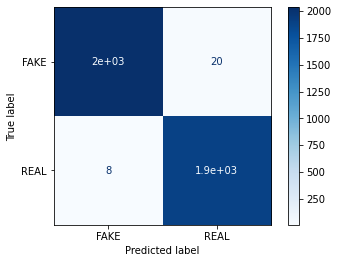

In [ ]:
#confusion matrix 

clf = plot_confusion_matrix(RF_model, X_test, y_test,
                      display_labels=['FAKE', 'REAL'],
                      cmap=plt.cm.Blues,
                      normalize=None)

plt.show()

In [47]:
#predicting for test file

test=pd.read_csv('test.csv') 
#test = test.drop_duplicates(subset=['title'], keep = 'first')
test.fillna('Not Available', inplace=True)
for col in ['title', 'author', 'text']:
    test[col] = test[col].apply(lambda x : re.sub('[^a-z,A-Z]', ' ', x).lower())
test['total'] = test['title']  + ' ' + test['author'] 
X_act_test = vectorizer.transform(test['total'].values)
y_act_pred = RF_model.predict(X_act_test)
y_act_pred.sum()
submission = pd.DataFrame(list(zip(test['id'], y_act_pred)), columns =['id', 'label'])
submission.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [48]:
submission.to_csv('submission.csv', index = False)

In [49]:
#downloading the file for submission

from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analysis based on Topic modelling for further insights about underlying text

In [ ]:
Actual = train[train['label']==0]
Fake = train[train['label']==1]

In [ ]:
Fake['author'].value_counts()

not available            1870
admin                     220
pakalert                   84
starkman                   83
alex ansary                81
                         ... 
jekaterina iwanowa          1
barbara nimri aziz          1
allen l roland, phd         1
emanuel e  garcia, md       1
joseph mercola              1
Name: author, Length: 1555, dtype: int64

In [ ]:
Fake['title']

0        house dem aide  we didn t even see comey s let...
2                        why the truth might get you fired
3           civilians killed in single us airstrike hav...
4        iranian woman jailed for fictional unpublished...
6        life  life of luxury  elton john s   favorite ...
                               ...                        
20786    government forces advancing at damascus aleppo...
20788    maine s gov  lepage threatens to  investigate ...
20791    lawyer who kept hillary campaign chief out of ...
20793    idiot who destroyed trump hollywood star gets ...
20798    nato, russia to hold parallel exercises in bal...
Name: title, Length: 9423, dtype: object

In [ ]:
Actual['author'].value_counts()

pam key                                                        242
jerome hudson                                                  166
charlie spiering                                               141
john hayward                                                   140
katherine rodriguez                                            124
                                                              ... 
ben hubbard, eric lipton, dan levin and richard c  paddock       1
jonathan mahler and julie turkewitz                              1
carlotta gall and lilia blaise                                   1
walt bogdanich, jacqueline williams and ana graciela m ndez      1
julie creswell and sapna maheshwari                              1
Name: author, Length: 2225, dtype: int64

In [ ]:
# import libraries  
import numpy as np
import pandas as pd
import nltk
import re, random, os
import string, pprint
import matplotlib.pyplot as plt
import seaborn as sns

# spacy for basic preprocessing, optional, can use nltk as well (lemmatisation etc.)
import spacy

# gensim for LDA 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=7e8b55c302658999f71a052cf9ea6cace2cdc61ee97434528277a15d9546063a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# tokenize using gensim simple_preprocess
def sent_to_words(sentences, deacc=True): # deacc=True removes punctuations
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))  


# convert to list
data = Actual['title'].values.tolist()
data_words = list(sent_to_words(data))

# sample
print(data_words[7])

['in', 'major', 'league', 'soccer', 'argentines', 'find', 'home', 'and', 'success', 'the', 'new', 'york', 'times']


In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# create list of stop words
# string.punctuation (from the 'string' module) contains a list of punctuations
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + list(string.punctuation)


In [ ]:
# functions for removing stopwords and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# call functions

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# initialize spacy 'en' model, use only tagger since we don't need parsing or NER 
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[1])

['would', 'love', 'trump', 'bomb', 'bathroom', 'exclusive', 'video', 'breitbart']


In [ ]:
# compare the nostop, lemmatised version with the original one
# note that speakers is lemmatised to speaker; 
print(' '.join(data_words[3]), '\n')
print(' '.join(data_lemmatized[3]))

excerpts from draft script for donald trump ampa with black church pastor the new york times 

church


In [ ]:
!python3 -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
# create dictionary and corpus
# create dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create corpus
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# sample
print(corpus[2])

[(10, 1)]


In [ ]:
# human-readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('campus', 1), ('woman', 1)]]

In [ ]:
data = Fake['title'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# initialize spacy 'en' model, use only tagger since we don't need parsing or NER 
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# create dictionary and corpus
# create dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create corpus
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# print the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"email" + 0.042*"new" + 0.034*"news" + 0.026*"run" + 0.025*"war" + '
  '0.023*"come" + 0.018*"warn" + 0.018*"take" + 0.015*"force" + 0.014*"lose"'),
 (1,
  '0.101*"trump" + 0.047*"video" + 0.044*"say" + 0.028*"help" + 0.024*"voter" '
  '+ 0.017*"use" + 0.015*"happen" + 0.015*"destroy" + 0.014*"report" + '
  '0.013*"work"'),
 (2,
  '0.058*"campaign" + 0.033*"day" + 0.033*"win" + 0.025*"find" + 0.025*"old" + '
  '0.024*"russian" + 0.021*"end" + 0.020*"speak" + 0.020*"may" + '
  '0.020*"expose"'),
 (3,
  '0.028*"reveal" + 0.024*"head" + 0.021*"charge" + 0.021*"fraud" + '
  '0.021*"fight" + 0.018*"keep" + 0.016*"speech" + 0.016*"even" + '
  '0.015*"demand" + 0.014*"community"'),
 (4,
  '0.046*"vote" + 0.035*"state" + 0.021*"could" + 0.020*"try" + 0.018*"black" '
  '+ 0.017*"dead" + 0.017*"attack" + 0.017*"ban" + 0.015*"good" + '
  '0.015*"large"'),
 (5,
  '0.068*"comment" + 0.020*"release" + 0.019*"water" + 0.019*"right" + '
  '0.018*"pay" + 0.017*"tell" + 0.017*"white" + 0.0

In [ ]:
# coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5777331255369152


In [ ]:
# visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.352806  0.074041       1        1  12.804075
1     -0.115973  0.335435       2        1  11.705652
0     -0.037538 -0.075196       3        1  10.430163
4     -0.034855 -0.083706       4        1  10.398932
6     -0.043819 -0.043382       5        1   9.873480
8     -0.029201 -0.064405       6        1   9.219894
9     -0.026012 -0.030942       7        1   9.179100
5     -0.022671 -0.037065       8        1   9.112242
2     -0.023404 -0.040814       9        1   8.794596
3     -0.019333 -0.033965      10        1   8.481866, topic_info=          Term        Freq       Total Category  logprob  loglift
36       trump  502.000000  502.000000  Default  30.0000  30.0000
72    election  399.000000  399.000000  Default  29.0000  29.0000
303    comment  265.000000  265.000000  Default  28.0000  28.0000
125      email  237.000000  237.000000  Default  27.0000  27.0000
124   campaign  216.000000  216.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2033    nearly   26.874951   27.645611  Topic10  -4.8974   2.4390
2256    likely   26.669963   27.440544  Topic10  -4.9050   2.4388
114    massive   25.763877   26.534441  Topic10  -4.9396   2.4378
1355     cause   25.466984   26.237564  Topic10  -4.9512   2.4374
1861     early   24.742474   25.513019  Topic10  -4.9801   2.4366

[334 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1188      6  0.969264     abuse
868       4  0.977298    accuse
1620      1  0.975658   advance
94        2  0.994153  american
1107      8  0.971365  announce
...     ...       ...       ...
20        5  0.995573     woman
578       2  0.982770      work
271       5  0.988679     world
399       5  0.985493     would
392       6  0.991352      year

[314 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 1, 5, 7, 9, 10, 6, 3, 4])